### Importación de librerías

In [1]:
import serial 
import serial.tools.list_ports
import roboticstoolbox as rtb
import spatialmath as sm
import numpy as np

#### Identicación de puertos, configuración del serial.

In [2]:
ports = serial.tools.list_ports.comports()

for port, desc, hwid in sorted(ports):
        print("{}: {} [{}]".format(port, desc, hwid))

In [3]:
#
ports

[]

#### Instancia del manipulador 

In [4]:
thor = rtb.models.DH.ThorArm()
thor

DHRobot: Thor (by Open_Source), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌──────────┬─────┬──────┬────────┬─────────┬────────┐
│   θⱼ     │ dⱼ  │  aⱼ  │   ⍺ⱼ   │   q⁻    │   q⁺   │
├──────────┼─────┼──────┼────────┼─────────┼────────┤
│ q1       │ 0.2 │    0 │  90.0° │ -180.0° │ 180.0° │
│ q2 + 90° │   0 │ 0.16 │   0.0° │  -90.0° │  90.0° │
│ q3 - 90° │   0 │    0 │ -90.0° │  -90.0° │  90.0° │
│ q4       │ 0.1 │    0 │  90.0° │ -100.0° │ 100.0° │
│ q5       │   0 │    0 │ -90.0° │ -180.0° │ 180.0° │
│ q6       │   0 │    0 │   0.0° │ -180.0° │ 180.0° │
└──────────┴─────┴──────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬──────┬─────┬─────┬─────┐
│name │ q0  │ q1   │ q2   │ q3  │ q4  │ q5  │
├─────┼─────┼──────┼──────┼─────┼─────┼─────┤
│  qr │  0° │  0°  │  0°  │  0° │  0° │  0° │
│  qz │  0° │ -90° │  0°  │  0° │  0° │  0° │
│  qs │  0° │  0°  │ -90° │  0° │  0° │  0° │
└─────┴─────┴──────┴──────┴─────┴─────┴─────┘

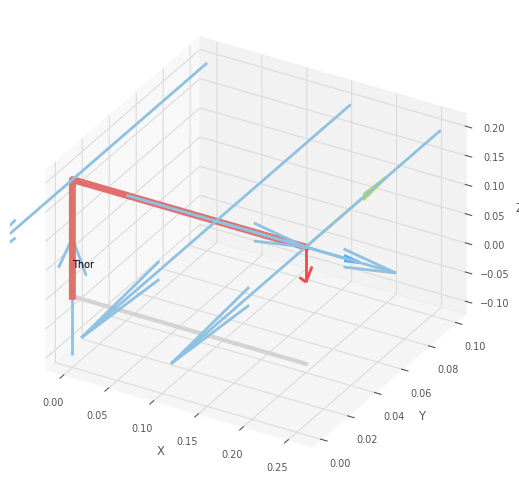

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [5]:
# Thor en configuración cero con todas las variables articulares en 0
thor.plot(thor.qz)

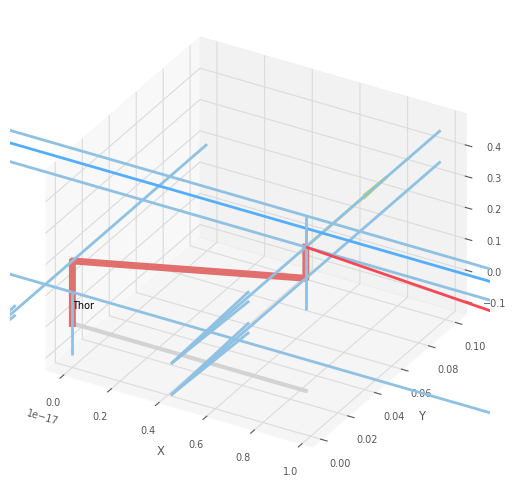

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [7]:
# Thor en posición vertical
thor.plot(thor.qr)

#### Cinemática directa e inversa

In [19]:
qx = np.deg2rad([45, 30, 50, 30, 10, 0])

In [21]:
Pose1 = thor.fkine(qx)
Pose1

  -0.3644   -0.6738   -0.6429   -0.1262    
   0.332     0.551    -0.7656   -0.1262    
   0.8701   -0.4924    0.02291   0.3559    
   0         0         0         1         


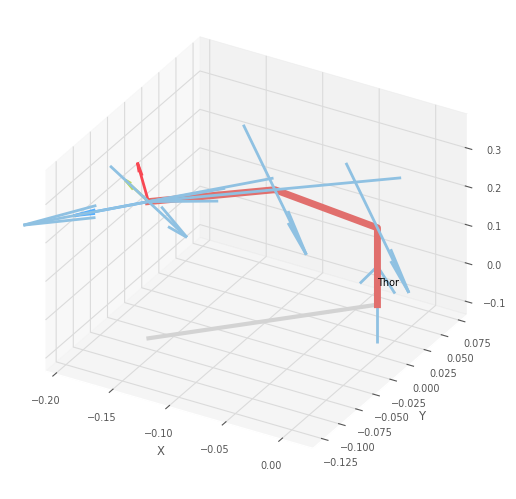

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [23]:
thor.plot(qx)

In [26]:
qx_inv = thor.ikine_LM(Pose1)
np.rad2deg((qx_inv.q))

array([-135.00000001,  -67.71614036,   50.00001676,    5.26742717,
        -71.04070836, -152.09403945])

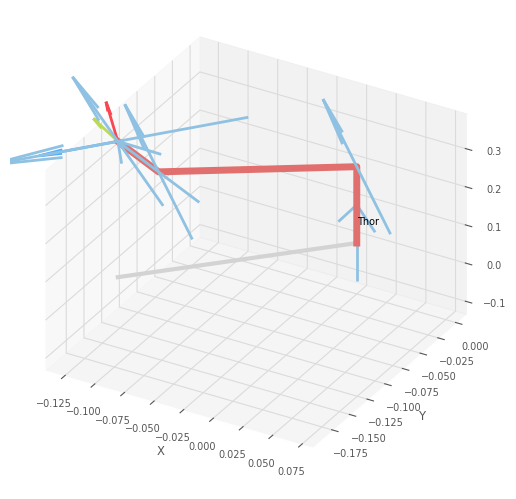

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Thor')

<Figure size 640x480 with 0 Axes>

In [27]:
thor.plot(qx_inv.q)

In [11]:
sPort = serial.Serial()
sPort.baudrate = 9600
sPort.port = '/dev/ttyACM0'
sPort.open()
sPort.is_open

SerialException: [Errno 2] could not open port /dev/ttyACM0: [Errno 2] No such file or directory: '/dev/ttyACM0'

In [20]:
sPort.close()

In [22]:
sPort.is_open

False

In [27]:
sPort.write("-360, 500".encode())

9

In [48]:
sPort.write("0, 100".encode())

6